In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('excel/employee.csv')
traveller = df[(df['BusinessTravel']=='Travel_Frequently')]
traveller.shape

(277, 35)

In [2]:
females = df[(df['BusinessTravel']=='Travel_Frequently') & (df['Gender']=='Female')] 
females['Gender'].shape

(117,)

In [3]:
#Can't figure out the "or" condition
#single = df[(df['BusinessTravel']=='Travel_Frequently') & (df['MaritalStatus']=={'Single'} | {'Divorced'})]
#single

In [4]:
single = traveller[(traveller['MaritalStatus']!='Married')]
single[['BusinessTravel','MaritalStatus']].shape

(159, 2)

In [5]:
single['mstatus'] = single['MaritalStatus'].replace({'Divorced' : 'single'})
single[['BusinessTravel','mstatus']].shape

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(159, 2)

In [6]:
bins = [15, 20, 30, 40, 50, 60, 70]
single['ageFilter'] = pd.cut(df['Age'], bins = bins)
single[['ageFilter', 'Age']].sort_values(by='ageFilter').shape


/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(159, 2)

In [25]:
jobSatisfaction=['Hating my job','Not happy','Happy','Very happy']
chart=pd.crosstab(df['JobSatisfaction'], 'pcs')
chart.index=jobSatisfaction
chart.columns.name='JobSatisfaction'
chart['%']=chart/chart.sum()
chart.style.format({'%': '{:.2%}'})

JobSatisfaction,pcs,%
Hating my job,289,19.66%
Not happy,280,19.05%
Happy,442,30.07%
Very happy,459,31.22%


Text(0, 0.5, 'Scale Of Happiness')

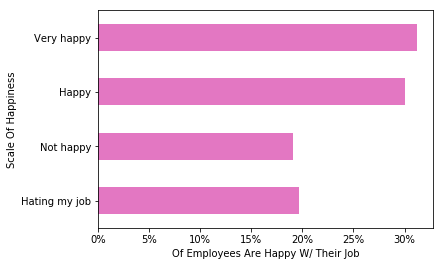

In [26]:
chart2 = chart['%'].plot.barh(color = 'C6')
vals = chart2.get_xticks()
chart2.set_xticklabels(['{:.0%}'.format(x) for x in vals])
plt.xlabel('Of Employees Are Happy W/ Their Job')
plt.ylabel('Scale Of Happiness')

TypeError: 'AxesSubplot' object is not subscriptable

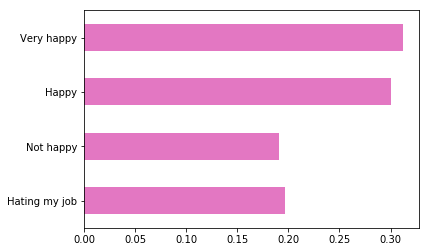

In [30]:
chart2 = chart['%'].plot.barh(color = 'C6')
vals = chart2.get_xticks()

for i in range(len(chart2['JobSatisfaction'])):
    plt.text(x = chart2[i]-0.5 , y = chart2[i]+0.1, s = chart2['pcs'][i], size = 6)


chart2.set_xticklabels(['{:.0%}'.format(x) for x in vals])
plt.xlabel('Of Employees Are Happy W/ Their Job')
plt.ylabel('Scale Of Happiness')

In [22]:
chart['pcs']

JobSatisfaction
1    289
2    280
3    442
4    459
Name: pcs, dtype: int64